# Alibaba Cloud Server CPU Prediction (w/ Keras)

Data

In [11]:
import pandas as pd
import numpy as np
df  = pd.read_csv("data.csv")
dataset = np.array(df)
X = dataset[:, 3] # memory column
Y = dataset[:, 2] # cpu column
ID = dataset[:, 1] # node id column
X = np.asarray(X).astype('float32')
Y = np.asarray(Y).astype('float32')

Plotting the Data

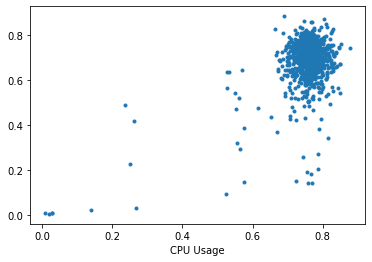

In [12]:
import matplotlib.pyplot as plt
plt.scatter(x=X, y=Y, marker=".")
plt.xlabel("CPU Usage")
plt.show()

Splitting the Data

In [13]:
from sklearn.model_selection import train_test_split

X = X.reshape(-1, 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

Model - Multi Layer Perceptron Regression

In [14]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, activation='relu', input_shape=(None, X_train.shape[1])),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = 'mean_squared_error',
    optimizer = 'SGD',
    metrics = ['mean_squared_error']
)

hist = model.fit(X_train, Y_train, 
                    epochs=10, verbose=1)

Epoch 1/10
24/24 [==============================] - 0s 836us/step - loss: 0.1942 - mean_squared_error: 0.1942
Epoch 2/10
24/24 [==============================] - 0s 840us/step - loss: 0.0230 - mean_squared_error: 0.0230
Epoch 3/10
24/24 [==============================] - 0s 849us/step - loss: 0.0137 - mean_squared_error: 0.0137
Epoch 4/10
24/24 [==============================] - 0s 848us/step - loss: 0.0130 - mean_squared_error: 0.0130
Epoch 5/10
24/24 [==============================] - 0s 802us/step - loss: 0.0130 - mean_squared_error: 0.0130
Epoch 6/10
24/24 [==============================] - 0s 766us/step - loss: 0.0130 - mean_squared_error: 0.0130
Epoch 7/10
24/24 [==============================] - 0s 760us/step - loss: 0.0130 - mean_squared_error: 0.0130
Epoch 8/10
24/24 [==============================] - 0s 817us/step - loss: 0.0130 - mean_squared_error: 0.0130
Epoch 9/10
24/24 [==============================] - 0s 788us/step - loss: 0.0130 - mean_squared_error: 0.0130
Epoch 10/1

Prediction

In [15]:
Y_predict = model.predict(X_test).ravel()

Plotting the Predicted CPU Usage

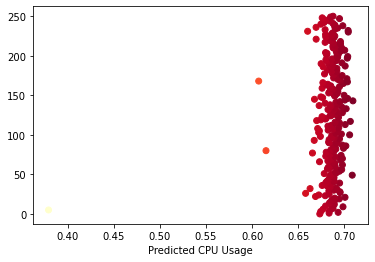

In [16]:
plt.scatter(x=Y_predict, y=list(range(0, 251)), c=X_test, cmap="YlOrRd")
plt.xlabel("Predicted CPU Usage")
plt.show()

Node ID and their Predicted CPU Usage

In [17]:
listY_test = list(Y_test)
listID = list(ID)
listY_predict = list(Y_predict)
tmp = []
# list of node id's in the test set
for i in listY_test:
    tmp.append(listY_test.index(i))
listY_test_id = []
for i in tmp:
    listY_test_id.append(listID[i])
    
# printing node id's and their predicted cpu usage
for i, j in zip(listY_test_id, listY_predict):
    print("Node ID =", i, "Predicted CPU Usage =", j)

Node ID = b1f98eed32dcd1bcb575af5f483ab12c3b7981b7d25c6595a54de6376c381c22 Predicted CPU Usage = 0.6733998
Node ID = 50f7c53d8692424fbe603c78b4e61c19276a7823df7a85f1767762054213dec7 Predicted CPU Usage = 0.6835087
Node ID = 02d27a3d3bfa1b60f607ef05c14d2e37ef2fdb271e32e79ed483235a095c8010 Predicted CPU Usage = 0.693298
Node ID = b5952eee6a521b0f2b7ae15b122cc5a3714aba85cd5614ed8bf71b6f2736779f Predicted CPU Usage = 0.6743751
Node ID = 2acfac3d84cd4aa3bb5d243069d18b8b2bcc8dfb84527c524ce3979287c6f056 Predicted CPU Usage = 0.6839362
Node ID = 5cbd9ac26a81e868dfadf945054eb6bd8703131c99c536f8e1bc32fc257b09a9 Predicted CPU Usage = 0.37911937
Node ID = f66333e4613351b2dd89e7ffdb604cb4016f34c4084ec3b8351c047d576699bc Predicted CPU Usage = 0.67695093
Node ID = 1946291c5b695555122161e1bd00a4e955b32520ff3bf742cd9f52e630fb0d1d Predicted CPU Usage = 0.6877385
Node ID = 2d36938c8e73138710f776269a1146eab7c2f6be4f6f4a0b224b915ca295ad51 Predicted CPU Usage = 0.68701154
Node ID = bb23c55fca977cfd860f6a929